<a href="https://colab.research.google.com/github/TiagolGoulart/ScoreIbovTools/blob/main/aposentadoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Com esse código é possível estimar a quantidade de anos que a pessoa deveria investir para atingir a aposentadoria desejada no futuro, além da possibilidade de incrementar anualmente o aporte fazendo com que esse tempo seja encurtado caso seja seguida a tabela de evolução.



In [ ]:
!pip install pandas -q
!pip install numpy -q

In [1]:
import pandas as pd
import numpy as np

In [2]:
anos = []
aportes_atuais=[]
valores_finais=[]
proximos_aportes=[]
valores_iniciais=[]


print("======== Valor investido para ter o salário desejado =======\n\n")
# Cálculo do valor necessário para se aposentar com o salário pretendido
salario = input("Qual o salário que você quer ter ao se aposentar?\n")
i = 0.008
valor_total = 1 * float(salario)/i
print("Para conquistar esse salário no futuro, você precisa acumular\nR$ " + str(int(valor_total))+",00")

# Cálculo de aporte mensal necessário
tempoAno = input("Daqui a quantos anos você espera se aposentar?\n")
tempoMes = int(tempoAno)*12
pmt = (valor_total*i)/((1+i)**tempoMes-1)

print("Para conseguir se aposentar daqui a " + tempoAno + " anos, você precisa " +
    "fazer aportes mensais de: R$ %.2f" %(pmt))

# Cálculo do aporte mensal necessário caso a capacidade de aportes aumente
print("\n=========================================================")
print("\n\nMas não se desespere, esse valor pode ser menor se você espera " +
"aumentar seus aportes ao longo dos anos\n")
aporteAtual = float( input("Quanto você pode investir por mês hoje?\n"))
percentual = float( input("Quantos por cento ao ano você espera aumentar" +
" sua capacidade de investimento?\n"))
percentual = percentual/100
valor_final = 0
time = 0
valores_iniciais.insert(0,0)
print("")
while (valor_final < valor_total):
    valor_final = (valor_final*((1+(i))**12))+(aporteAtual*(((((1+(i)))**12)-1)/(i)))
    '''print("\n====== Ano nº " + str(time)+" =======")
    print("Aporte atual")
    print("R$ %.2f" %(aporteAtual))'''
    anos.insert(time,time)
    valores_finais.insert(time,round(valor_final,2))
    aportes_atuais.insert(time,round(aporteAtual,2))
    aporteAtual = aporteAtual*(1+percentual)
    proximos_aportes.insert(time,round(aporteAtual,2))
    if time>0:
      valores_iniciais.insert(time,valores_finais[time-1])

    time += 1
    '''print("Valor ao final do ano")
    print("R$ %.2f" %(valor_final))
    print("Próximo aporte")
    print("R$ %.2f" %(aporteAtual))'''

salarioFinal = (valor_final*i)
print("\nCom esse aumento anual de poder de investimento dentro de " + str(time-1) +
" anos, você terá acumulado R$ %.2f" %(valor_final))
print("\nIsso lhe dará um salário de R$ %.2f" %(salarioFinal))

======== Valor investido para ter o salário desejado =======


Qual o salário que você quer ter ao se aposentar?
20000
Para conquistar esse salário no futuro, você precisa acumular
R$ 2500000,00
Daqui a quantos anos você espera se aposentar?
20
Para conseguir se aposentar daqui a 20 anos, você precisa fazer aportes mensais de: R$ 3466.78



Mas não se desespere, esse valor pode ser menor se você espera aumentar seus aportes ao longo dos anos

Quanto você pode investir por mês hoje?
2500
Quantos por cento ao ano você espera aumentar sua capacidade de investimento?
5


Com esse aumento anual de poder de investimento dentro de 19 anos, você terá acumulado R$ 2563691.28

Isso lhe dará um salário de R$ 20509.53


In [3]:
d = {'ano':anos,'v_i':valores_iniciais,'aporte_atual':aportes_atuais,'v_f_a':valores_finais,'prox_aporte':proximos_aportes}

In [4]:
df = pd.DataFrame(data=d)

In [9]:
df

,ano,v_i,aporte_atual,v_f_a,prox_aporte
0,0,0.00,2500.00,31355.84,2625.00
1,1,31355.84,2625.00,67425.68,2756.25
2,2,67425.68,2756.25,108760.90,2894.06
3,3,108760.90,2894.06,155972.13,3038.77
4,4,155972.13,3038.77,209735.39,3190.70
5,5,209735.39,3190.70,270798.85,3350.24
6,6,270798.85,3350.24,339990.28,3517.75
7,7,339990.28,3517.75,418225.28,3693.64
8,8,418225.28,3693.64,506516.32,3878.32
9,9,506516.32,3878.32,605982.71,4072.24


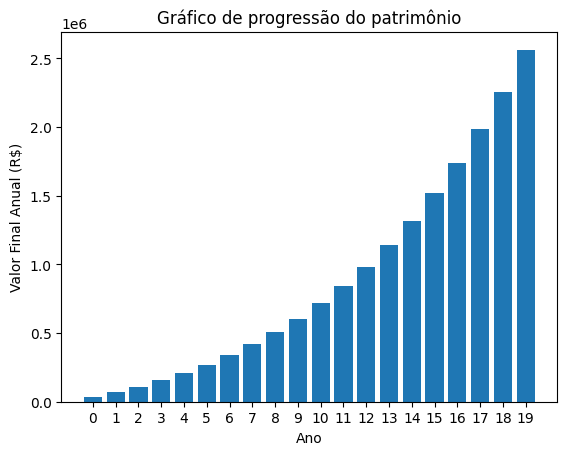

In [16]:
import matplotlib.pyplot as plt

# Plotar gráfico de barras de anos por valor final
plt.bar(df['ano'], df['v_f_a'])
plt.xlabel('Ano')
plt.ylabel('Valor Final Anual (R$)')
plt.title('Gráfico de progressão do patrimônio')

# Definir valores inteiros no eixo x com espaçamento
plt.xticks(np.arange(len(anos)), anos)

plt.show()

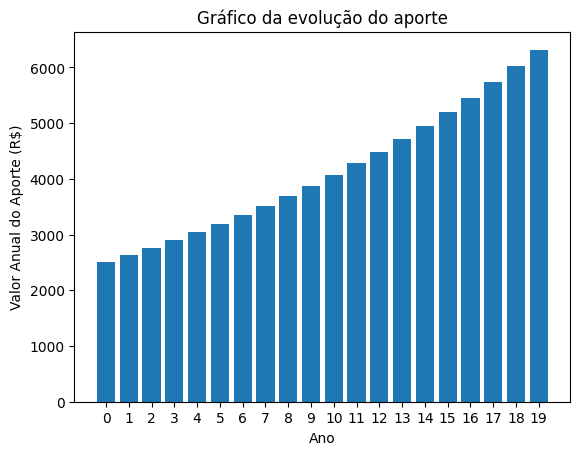

In [17]:
# Plotar gráfico de barras de aportes ao longo dos anos
plt.bar(df['ano'], df['aporte_atual'])
plt.xlabel('Ano')
plt.ylabel('Valor Anual do Aporte (R$)')
plt.title('Gráfico da evolução do aporte')

# Definir valores inteiros no eixo x
plt.xticks(np.arange(len(anos)), anos)

plt.show()